In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os

In [2]:
from datetime import datetime, timedelta

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


fecha_inicial=datetime.now()
w_ruta_GD='/content/drive/MyDrive/VIU/TFM/Desarrollo/'


w_ruta_V6=w_ruta_GD+"Data/DF_Resumido_etiquetado.csv"
w_ruta=w_ruta_GD+"Data/DF_Anonimizado.csv"
w_ruta_pd="Data/Datos_anonimizados.html"


w_random=1990
np.random.seed(w_random)

Mounted at /content/drive/


##Carga de datos

In [5]:
# Cargar los datos del perfil del cliente
df = pd.read_csv(w_ruta,sep=",")

In [6]:
df['FEC_AUTORIZACION'] = pd.to_datetime(df['FEC_AUTORIZACION'])
df['mes'] =  (df['FEC_AUTORIZACION'].dt.month).apply(lambda x: "{:02d}".format(x)).astype(str)

In [7]:
df_conteo_periodo = df[['mes','NUM_AUTORIZACION_TC']].groupby('mes').count().reset_index()
df_conteo_periodo = df_conteo_periodo.rename(columns={'NUM_AUTORIZACION_TC': 'CONTEO'})
df_conteo_periodo = df_conteo_periodo.sort_values('mes', ascending=True)
df_conteo_periodo=df_conteo_periodo.set_index('mes')

In [8]:
df_conteo_periodo

,CONTEO
mes,
05,12066
06,12197
07,15792
08,15465
09,16125
10,17658
11,20811


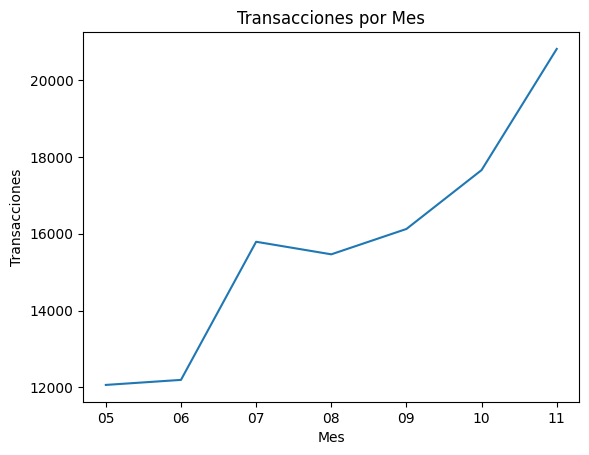

In [9]:
plt.plot(df_conteo_periodo.index, df_conteo_periodo['CONTEO'])
plt.xlabel('Mes')
plt.ylabel('Transacciones')
plt.title('Transacciones por Mes')
plt.show()